In [1]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")
df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
X=df[df.columns[:-1]]
y=df['outcome']

In [3]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#refit='AUC' AUC 추정값을 교차검증한 점수가 가장 좋은 매개변수
#make_scorer() 사용자정의 평가함수를 지정하는 함수
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
param_grid={'min_samples_split': range(2, 403, 10)},
scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_
results


{'mean_fit_time': array([0.0047348 , 0.00442238, 0.00433035, 0.00432487, 0.0046587 ,
        0.00471816, 0.00359869, 0.00332842, 0.00375748, 0.00371609,
        0.00371366, 0.00361314, 0.00346251, 0.00322871, 0.0038456 ,
        0.00314665, 0.00310025, 0.00334153, 0.00334296, 0.0026329 ,
        0.00300021, 0.00323019, 0.00294013, 0.00301776, 0.0030026 ,
        0.00298157, 0.00280819, 0.00251203, 0.00255337, 0.00220575,
        0.00282602, 0.00242329, 0.00242419, 0.00293083, 0.00239897,
        0.00310655, 0.00239944, 0.00260243, 0.00300083, 0.00274539,
        0.00280166]),
 'std_fit_time': array([6.51816484e-04, 7.87655740e-04, 8.59344271e-04, 4.18993650e-04,
        6.05093108e-04, 1.97448904e-03, 7.86658913e-04, 4.24934915e-04,
        3.88686929e-04, 6.26284477e-04, 8.86310816e-04, 4.78220616e-04,
        5.44261302e-04, 4.05890231e-04, 7.29812591e-04, 6.98135637e-04,
        2.02012421e-04, 6.84214079e-04, 6.87075199e-04, 4.66698541e-04,
        6.33013018e-04, 8.90711525e-04, 5

In [4]:
print(results['mean_test_AUC'])
print(results['mean_test_Accuracy'])

[0.68427324 0.73324354 0.76396296 0.77676834 0.78944235 0.78680154
 0.79156883 0.79634172 0.79734556 0.80109574 0.79870755 0.79870755
 0.79754088 0.7982673  0.80199301 0.79594444 0.78316667 0.77030294
 0.76592558 0.76592558 0.76592558 0.76117365 0.75559713 0.75400594
 0.75400594 0.74200035 0.74200035 0.74200035 0.7377362  0.7377362
 0.7377362  0.7377362  0.7377362  0.7377362  0.73290287 0.73290287
 0.73290287 0.73290287 0.73290287 0.70984207 0.70984207]
[0.71630592 0.72409812 0.71751974 0.7188439  0.73185638 0.73056617
 0.73966556 0.74358713 0.73967405 0.74618453 0.73966556 0.73966556
 0.73966556 0.74096426 0.73312962 0.73705118 0.73575248 0.74484339
 0.74092182 0.74092182 0.74092182 0.73311264 0.73181394 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152]


In [5]:
results['param_min_samples_split'].data

array([2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142,
       152, 162, 172, 182, 192, 202, 212, 222, 232, 242, 252, 262, 272,
       282, 292, 302, 312, 322, 332, 342, 352, 362, 372, 382, 392, 402],
      dtype=object)

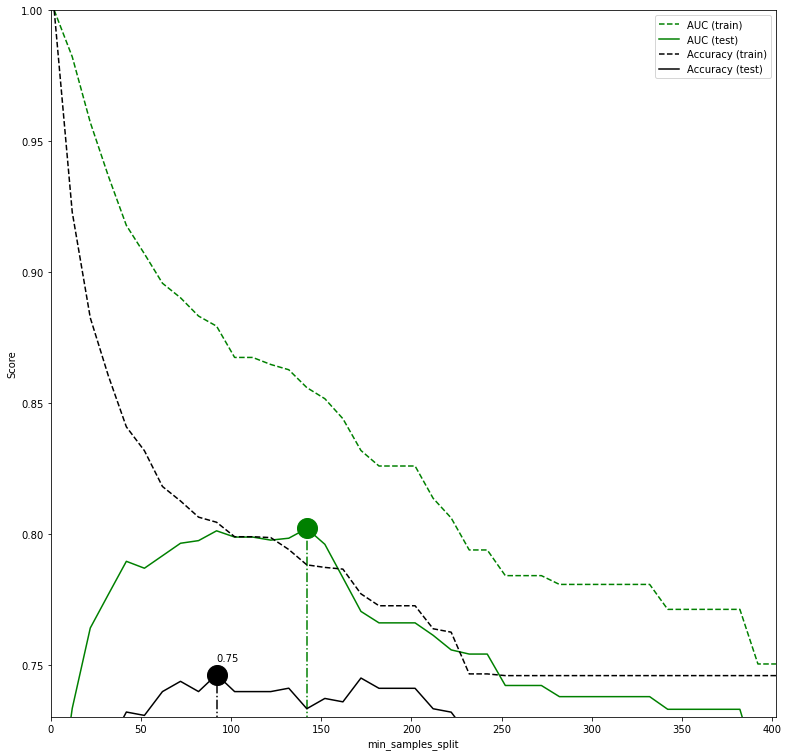

In [10]:
# GridSearchCV 다양한 측정 지표를 사용하여 평가한
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(13, 13))
plt.xlabel("min_samples_split")
plt.ylabel("Score")
ax = plt.gca() #current axes 반환
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)
#min_samples_split의 값
X_axis = np.array(results['param_min_samples_split'].data,
dtype=float)
for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        ax.plot(X_axis, sample_score_mean, style, color=color, label="%s (%s)" % (scorer, sample))
    best_index=np.argmax(results['mean_test_%s' % scorer])
    best_score=results['mean_test_%s' % scorer][best_index]
    # 최고 점수에 수직선 표시
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], linestyle='-.', color=color, marker='o', ms=20)
    #print(X_axis())
# 최고 점수 표시
ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
plt.legend()
plt.grid(False)
plt.show()